In [405]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [406]:
train_file = open('../input/train.csv', 'r') 
test_file = open('../input/test.csv', 'r')
train_df = pd.read_csv(train_file, index_col='PassengerId')
test_df = pd.read_csv(test_file, index_col='PassengerId')

In [407]:
train_df.info()
print '----------------------------------'
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
----------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), i

In [408]:
combine = train_df.drop('Survived', axis=1).append(test_df)

In [409]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


In [410]:
title = combine.Name.map(lambda name: name.split(',')[1].split('.')[0])
combine = combine.join(pd.get_dummies(title))

In [411]:
combine.drop(['Name'], axis=1, inplace=True)

In [412]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 27 columns):
Pclass           1309 non-null int64
Sex              1309 non-null object
Age              1046 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Ticket           1309 non-null object
Fare             1308 non-null float64
Cabin            295 non-null object
Embarked         1307 non-null object
 Capt            1309 non-null float64
 Col             1309 non-null float64
 Don             1309 non-null float64
 Dona            1309 non-null float64
 Dr              1309 non-null float64
 Jonkheer        1309 non-null float64
 Lady            1309 non-null float64
 Major           1309 non-null float64
 Master          1309 non-null float64
 Miss            1309 non-null float64
 Mlle            1309 non-null float64
 Mme             1309 non-null float64
 Mr              1309 non-null float64
 Mrs             1309 non-null float64
 Ms    

In [413]:
#Sex
combine= combine.join(pd.get_dummies(combine.Sex, prefix='Sex'))

In [414]:
avgAge = combine.Age.dropna().median()
combine.Age = combine.Age.fillna(avgAge)

In [415]:
combine['FamilySize'] = combine.Parch + combine.SibSp 
#sns.countplot(x='Survived', hue='Title', data=train_df)

combine.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [416]:
#Ticket
def tkt(t):
    arr =  t.replace('.', '').replace('/', '').split(' ')
    return arr[0] if len(arr) > 1 else 'NUM'
combine = combine.join(pd.get_dummies(combine.Ticket.map(tkt), prefix='Ticket'))

In [417]:
#Cabin
combine = combine.join(pd.get_dummies(combine.Cabin.fillna('U').map(lambda c : c[0]), prefix='Cabin'))

In [418]:
#Embark
combine.Embarked = combine.Embarked.fillna('S')
combine = combine.join(pd.get_dummies(combine.Embarked, prefix='Embarked'))

In [419]:
#Fare
FareMean = combine[['Pclass', 'Fare']].groupby('Pclass').mean().Fare
combine.ix[combine.Fare.isnull(), 'Fare'] = FareMean[combine.ix[combine.Fare.isnull(), 'Pclass'].values].values

In [420]:
#Drop
combine.drop(['Sex', 'Embarked', 'Ticket', 'Cabin'], axis=1, inplace=1)

In [421]:
train_x = combine.iloc[:891]
train_y = train_df.Survived

test_x = combine.iloc[891:]

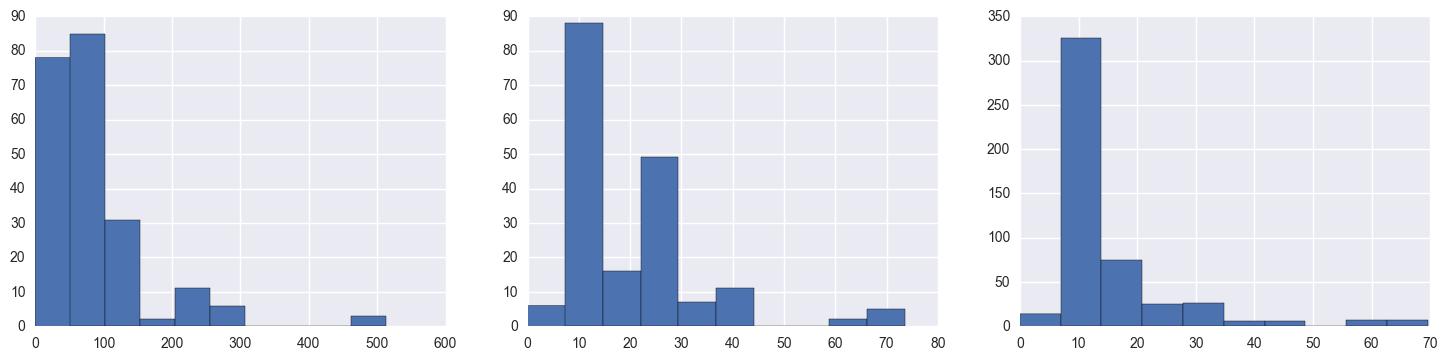

In [422]:
fg, ax = plt.subplots(1, 3, figsize=(18, 4))
train_df.ix[train_df.Pclass == 1, 'Fare'].hist(ax=ax[0])
train_df.ix[train_df.Pclass == 2, 'Fare'].hist(ax=ax[1])
train_df.ix[train_df.Pclass == 3, 'Fare'].hist(ax=ax[2])

In [423]:
def gender(person):
    return person.Sex
gd = train_df.apply(gender, axis=1).map({'female' : 0, 'male' : 1})
train_df['Gender'] = gd
train_df.drop(['Sex'], inplace=True, axis=1)

gd = test_df.apply(gender, axis=1).map({'female' : 0, 'male' : 1})
test_df['Gender'] = gd
test_df.drop(['Sex'], inplace=True, axis=1)

In [424]:
mode = train_df.Embarked.dropna().mode().values[0]
train_df.Embarked = train_df.Embarked.fillna(mode)

mode = test_df.Embarked.dropna().mode().values[0]
test_df.Embarked = test_df.Embarked.fillna(mode)

train_df['Embarked'] = train_df['Embarked'].map({'C' : 0, 'Q' : 1, 'S' : 2})
test_df['Embarked'] = test_df['Embarked'].map({'C' : 0, 'Q' : 1, 'S' : 2})

In [425]:
avgAge = train_df.Age.dropna().mean()
train_df.Age = train_df.Age.fillna(avgAge)

avgAge = test_df.Age.dropna().mean()
test_df.Age = test_df.Age.fillna(avgAge)

In [426]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 72 columns):
Pclass            1309 non-null int64
Age               1309 non-null float64
Fare              1309 non-null float64
 Capt             1309 non-null float64
 Col              1309 non-null float64
 Don              1309 non-null float64
 Dona             1309 non-null float64
 Dr               1309 non-null float64
 Jonkheer         1309 non-null float64
 Lady             1309 non-null float64
 Major            1309 non-null float64
 Master           1309 non-null float64
 Miss             1309 non-null float64
 Mlle             1309 non-null float64
 Mme              1309 non-null float64
 Mr               1309 non-null float64
 Mrs              1309 non-null float64
 Ms               1309 non-null float64
 Rev              1309 non-null float64
 Sir              1309 non-null float64
 the Countess     1309 non-null float64
Sex_female        1309 non-null float64
Sex_male       

In [427]:
from sklearn.cross_validation import cross_val_score
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
model = RandomForestClassifier(n_estimators=500)
model = model.fit(train_x, train_y)

In [428]:
pd.DataFrame(zip(train_x.columns, model.feature_importances_)).sort_values(by=1, ascending=False)

,0,1
1,Age,0.200475
2,Fare,0.191123
15,Mr,0.085466
22,Sex_male,0.083551
21,Sex_female,0.077219
23,FamilySize,0.074282
0,Pclass,0.058600
12,Miss,0.028358
68,Cabin_U,0.027205
16,Mrs,0.026780


In [429]:
from sklearn.feature_selection import SelectFromModel

m = SelectFromModel(model, prefit=True)
train_new = m.transform(train_x)
train_new.shape

(891L, 10L)

In [430]:
test_new = model.transform(test_x)
test_new.shape

g:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


(418L, 10L)

In [431]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score

In [432]:
forest = RandomForestClassifier(max_features='sqrt')

parameter_grid = {
                 'max_depth' : [4,5,6,7,8],
                 'n_estimators': [200,210,240,250],
                 'criterion': ['gini','entropy']
                 }

cross_validation = StratifiedKFold(train_y, n_folds=5)

grid_search = GridSearchCV(forest,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(train_new, train_y)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.836139169473
Best parameters: {'n_estimators': 240, 'criterion': 'gini', 'max_depth': 7}


In [433]:
import csv
openfile = open('result.csv', 'wb')
csv_wt = csv.writer(openfile)
csv_wt.writerow(["PassengerId","Survived"])
csv_wt.writerows(zip(test_df.index.values, grid_search.predict(test_new)))
openfile.close()

In [434]:
train_x.tail()

,Pclass,Age,Fare,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
887,2,27.0,13.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
888,1,19.0,30.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,3,28.0,23.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
890,1,26.0,30.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
891,3,32.0,7.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
